# Overfitting and Underfitting


### Understanding the Learning Curves

We train a model by choosing parameters and weights to get the minimal loss of a training set and we use a validation set to measure the performance of our model.

### Capacity

The __Capacity__ refers to the size and complexity of the pattern it is able to learn. A model can be wider by having more units to the existing _layer_ or more deeper by adding more _layers_.

```python
model = keras.Sequential([
    (layers.Dense(16, activation='relu')),
    (layers.Dense(1))
])

wider = keras.Sequential([
    (layers.Dense(32, activation='relu')),
    (layers.Dense(1))
])

deeper = keras.Sequential([
    (layers.Dense(16, activation='relu')),
    (layers.Dense(16, activation='relu')),
    (layers.Dense(1))
])
```

### Early Stopping

Early stopping is when the during training the validation loss is not decreasing anymore. 

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks

```python
early_stopping = EarlyStopping(
    min_delta=0.001, # minimum amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True, 
)
```

In [74]:
data = pd.read_csv('data/red-wine.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
df_train = data.sample(frac=0.7, random_state=0)
df_valid = data.drop(df_train.index)
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [76]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / max_ - min_
df_valid = (df_valid - min_) / max_ - min_

X_train = df_train.drop('quality', axis=1)
y_train = df_train['quality']
X_valid = df_valid.drop('quality', axis=1)
y_valid = df_valid['quality']

In [77]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,-4.210063,0.101519,0.544304,-0.813669,0.190223,-0.638889,-5.792388,-0.981966,-2.793077,-0.112828,-8.238926
1032,-4.379874,0.323038,0.000000,-0.669784,0.065836,-0.944444,-5.972318,-0.981627,-2.744359,-0.228990,-8.319463
1002,-4.316981,-0.012405,0.417722,-0.817266,0.013463,-0.833333,-5.927336,-0.984996,-2.770000,-0.072424,-8.178523
487,-4.247799,0.212278,0.455696,-0.835252,-0.002903,-0.944444,-5.972318,-0.981966,-2.793077,-0.284545,-8.292617
979,-4.122013,0.088861,0.620253,-0.864029,0.033103,-0.972222,-6.000000,-0.983262,-2.803333,-0.178485,-8.265772


In [78]:
y_train.head()

1109   -2.625
1032   -2.750
1002   -2.500
487    -2.625
979    -2.750
Name: quality, dtype: float64

In [79]:
t, v = X_train.shape, X_valid.shape
print(f'Shape of training set: {t}')
print(f'Shape of validation set: {v}')

Shape of training set: (1119, 11)
Shape of validation set: (480, 11)


In [80]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, # Min change to count as improvement
    patience = 20, # how many epochs to wait before stopping
    restore_best_weights = True
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

/home/rownak/Documents/projects/intro-deeplearning/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
model.weights

[<Variable path=sequential_3/dense_14/kernel, shape=(11, 512), dtype=float32, value=[[ 0.09340205  0.07848237  0.05871143 ... -0.04242066 -0.02954196
   -0.08170275]
  [-0.0620568   0.10270061  0.08350024 ...  0.02474456 -0.01579369
   -0.03012029]
  [ 0.07384429 -0.10005562 -0.10420658 ... -0.08469082 -0.0144382
    0.02069249]
  ...
  [-0.04586609 -0.07031567 -0.06562795 ...  0.07944629 -0.10341913
    0.09023076]
  [-0.04270136  0.10160235  0.01063833 ...  0.03544954  0.07765534
   -0.08799714]
  [ 0.06078302 -0.02578995 -0.04625114 ... -0.03423714 -0.09351621
    0.09919245]]>,
 <Variable path=sequential_3/dense_14/bias, shape=(512,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [82]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [83]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put all callbacks in a list
    verbose =0, # turn off training log
)

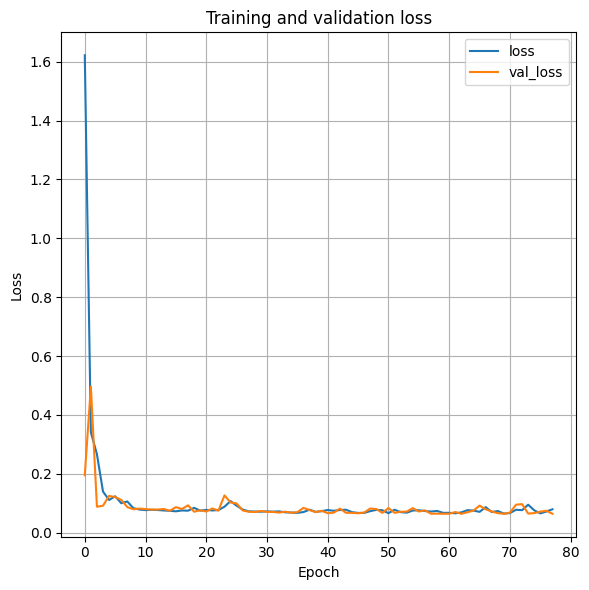

In [90]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(6, 6), dpi=100)
history_df[['loss', 'val_loss']].plot(
    ax=plt.gca(), title='Training and validation loss'
)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()